In [1]:
using AutomotiveDrivingModels
using Interact
using PyPlot

  likely near /home/tim/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/tim/.julia/v0.4/Interact/src/IJulia/setup.jl:157


In [2]:
const INCLUDE_FILE_BASE = "realworld"
const INCLUDE_FILE = Pkg.dir("AutomotiveDrivingModels", "scripts", "extract_params.jl")
const INCLUDE_NAME = splitdir(splitext(INCLUDE_FILE)[1])[2]

include(INCLUDE_FILE)
nothing

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/MacroTools/src/utils.jl:108
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tim/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tim/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/tim/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


In [3]:
dset_filepath_modifier = "_freeflow" # (_freeflow, _following, _lanechange)
println(dset_filepath_modifier)
dataset_jld_file = joinpath(EVALUATION_DIR, "dataset2" * dset_filepath_modifier * ".jld")
dset = JLD.load(dataset_jld_file, "model_training_data")::ModelTrainingData2
nothing

_freeflow


# compute min, max, mean, and stdev for each feature

In [4]:
dataframe = dset.dataframe
features = names(dataframe)
nfeatures = length(features)

stats = DataFrame(
            name = Array(Symbol, nfeatures),
            lo = Array(Float64, nfeatures),
            hi = Array(Float64, nfeatures),
            mean = Array(Float64, nfeatures),
            stdev = Array(Float64, nfeatures),
            na_count = Array(Int, nfeatures)
        )

for (i,sym) in enumerate(features)
    arr = convert(Vector{Float64}, dataframe[sym])
    length_orig = length(arr)
    arr = filter(v->!isinf(v), arr)
    
    stats[i, :name] = sym
    stats[i, :lo] = minimum(arr)
    stats[i, :hi] = maximum(arr)
    stats[i, :mean] = mean(arr)
    stats[i, :stdev] = std(arr)
    stats[i, :na_count] = length_orig - length(arr)
end

stats

,name,lo,hi,mean,stdev,na_count
1,velFs,2.363622707373003e-6,40.66126857599886,27.430034858491982,9.806908776125828,0
2,d_ml,-0.6336786662102543,3.9670277014905366,1.8326004015717454,0.5567629458445785,0
3,velFt,-4.560127001721162,5.487259570873103,0.006920537331548455,0.21248352927033787,0
4,curvature,-0.08342113142385274,0.1146949453510846,-0.0002966590300334731,0.0017958266213735702,0
5,speed,2.3641157887247824e-6,40.66134663200913,27.43110528445357,9.806218959539828,0
6,accFs,-8.964340660687002,9.31485575747773,0.014123599492326118,0.46526639535091135,0
7,d_mr,-0.26702770149053645,4.333678666210254,1.8325392530488438,0.5677927501903589,0
8,d_cl,-2.1170277014905365,2.4836786662102543,-0.0063638374707962134,0.5672058886415282,0
9,has_lane_right,0.0,1.0,0.6340338605342165,0.48170749028353743,0
10,f_des_angle,-0.5586391281828473,0.7268003726173872,0.0005509708669775182,0.01626965851047375,0


# visualize marginal distribution

Interact.Options{:ToggleButtons,Symbol}([Reactive.Input{Symbol}] velFs,"sym",:velFs,"velFs",Interact.OptionDict(Any["velFs","d_ml","velFt","curvature","speed","accFs","d_mr","d_cl","has_lane_right","f_des_angle"  …  "turnrate","velBy","ttcr_mr","accBx","est_ttcr","accBy","ttcr_ml","acc","posFt","n_lane_left"],Dict{Any,Any}("turnrate"=>:turnrate,"ttcr_mr"=>:ttcr_mr,"has_lane_left"=>:has_lane_left,"ttcr_ml"=>:ttcr_ml,"f_des_angle"=>:f_des_angle,"accBy"=>:accBy,"posFyaw"=>:posFyaw,"velFt"=>:velFt,"a_req_stayinlane"=>:a_req_stayinlane,"n_lane_right"=>:n_lane_right,"est_ttcr"=>:est_ttcr,"velBx"=>:velBx,"acc"=>:acc,"accFt"=>:accFt,"accFs"=>:accFs,"posFt"=>:posFt,"n_lane_left"=>:n_lane_left,"has_lane_right"=>:has_lane_right,"velFs"=>:velFs,"curvature"=>:curvature,"d_cl"=>:d_cl,"f_accel"=>:f_accel,"accBx"=>:accBx,"speed"=>:speed,"d_mr"=>:d_mr,"velBy"=>:velBy,"d_ml"=>:d_ml)),Any[],Any[])

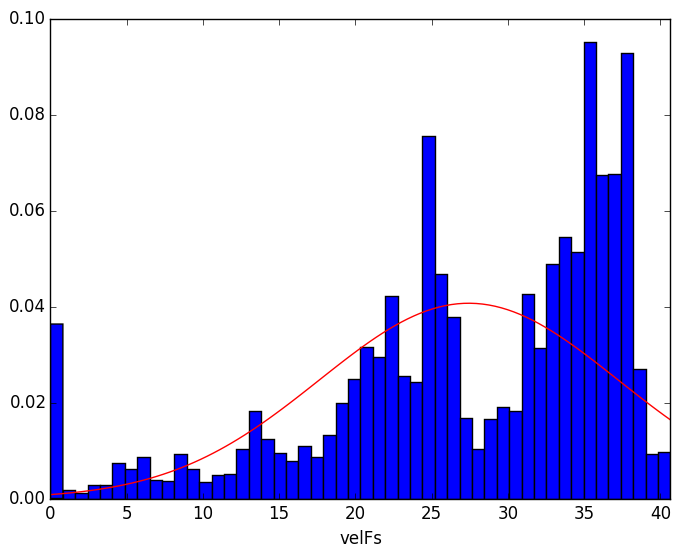

In [5]:
fig = figure(facecolor = "white")

npts_gaussian = 100
x_gaussian = Array(Float64, npts_gaussian)
y_gaussian = Array(Float64, npts_gaussian)

@manipulate for sym in features
    withfig(fig) do
        ax = fig[:add_subplot](111)
        ax[:set_xlabel](string(sym))
        ax[:hist](filter!(v->!isinf(v), convert(Vector{Float64}, dataframe[sym])), bins=50, normed=true)
        row = findfirst(stats[:name], sym)
        
        lo = stats[row, :lo]
        hi = stats[row, :hi]
        ax[:set_xlim](lo, hi)
        
        # plot the fit gaussian
        mean = stats[row, :mean]
        stdev = stats[row, :stdev]
        for (i,v) in enumerate(linspace(lo, hi, npts_gaussian))
            x_gaussian[i] = v
            y_gaussian[i] = 1/(stdev*sqrt(2*pi)) * exp(-0.5*((v-mean)/stdev)^2)
        end
        
        ax[:plot](x_gaussian, y_gaussian, color="r")
    end
end

# visualize correlation

Interact.Options{:ToggleButtons,Symbol}([Reactive.Input{Symbol}] velFs,"sym",:velFs,"velFs",Interact.OptionDict(Any["velFs","d_ml","velFt","curvature","speed","accFs","d_mr","d_cl","has_lane_right","f_des_angle"  …  "turnrate","velBy","ttcr_mr","accBx","est_ttcr","accBy","ttcr_ml","acc","posFt","n_lane_left"],Dict{Any,Any}("turnrate"=>:turnrate,"ttcr_mr"=>:ttcr_mr,"has_lane_left"=>:has_lane_left,"ttcr_ml"=>:ttcr_ml,"f_des_angle"=>:f_des_angle,"accBy"=>:accBy,"posFyaw"=>:posFyaw,"velFt"=>:velFt,"a_req_stayinlane"=>:a_req_stayinlane,"n_lane_right"=>:n_lane_right,"est_ttcr"=>:est_ttcr,"velBx"=>:velBx,"acc"=>:acc,"accFt"=>:accFt,"accFs"=>:accFs,"posFt"=>:posFt,"n_lane_left"=>:n_lane_left,"has_lane_right"=>:has_lane_right,"velFs"=>:velFs,"curvature"=>:curvature,"d_cl"=>:d_cl,"f_accel"=>:f_accel,"accBx"=>:accBx,"speed"=>:speed,"d_mr"=>:d_mr,"velBy"=>:velBy,"d_ml"=>:d_ml)),Any[],Any[])

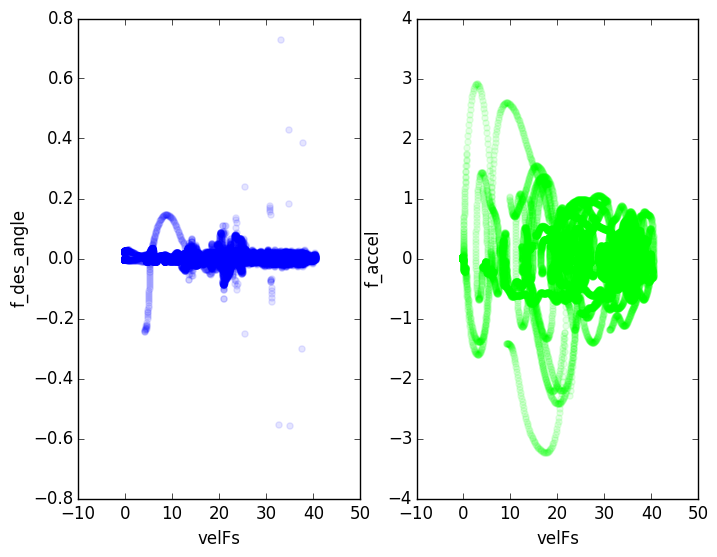

In [6]:
arr_f_des_angle = convert(Vector{Float64}, dataframe[:f_des_angle])
arr_f_accel = convert(Vector{Float64}, dataframe[:f_accel])

fig = figure(facecolor = "white")
@manipulate for sym in features
    withfig(fig) do

        arr = convert(Vector{Float64}, dataframe[sym])
        good_inds = find(v->!isinf(v), arr)

        ax1 = fig[:add_subplot](121)
        ax1[:set_xlabel](string(sym))
        ax1[:set_ylabel]("f_des_angle")
        ax1[:scatter](arr[good_inds], arr_f_des_angle[good_inds], color=[0.0,0.0,1.0,0.1])
        
        ax2 = fig[:add_subplot](122)
        ax2[:set_xlabel](string(sym))
        ax2[:set_ylabel]("f_accel")
        ax2[:scatter](arr[good_inds], arr_f_accel[good_inds], color=[0.0,1.0,0.0,0.1])
    end
end

In [27]:
stats[:cor_lat] = map(features) do sym
    arr = convert(Vector{Float64}, dataframe[sym])
    good_inds = find(v->!isinf(v), arr)
    cor(arr[good_inds], arr_f_des_angle[good_inds])
end
stats[:cor_lon] = map(features) do sym
    arr = convert(Vector{Float64}, dataframe[sym])
    good_inds = find(v->!isinf(v), arr)
    cor(arr[good_inds], arr_f_accel[good_inds])
end

stats

,name,lo,hi,mean,stdev,na_count,cor_lat,cor_lon
1,velFs,2.363622707373003e-6,40.66126857599886,27.430034858491982,9.806908776125828,0,-0.044497142840494074,0.02257047040639975
2,d_ml,-0.6336786662102543,3.9670277014905366,1.8326004015717454,0.5567629458445785,0,0.051474005170229285,-0.08271002716260109
3,velFt,-4.560127001721162,5.487259570873103,0.006920537331548455,0.21248352927033787,0,0.4354991956877837,0.09754001249146461
4,curvature,-0.08342113142385274,0.1146949453510846,-0.0002966590300334731,0.0017958266213735702,0,0.04790453156448923,-0.034386632313610666
5,speed,2.3641157887247824e-6,40.66134663200913,27.43110528445357,9.806218959539828,0,-0.04458622801637045,0.022641513573186542
6,accFs,-8.964340660687002,9.31485575747773,0.014123599492326118,0.46526639535091135,0,-0.09061630649698786,-0.9791071943001945
7,d_mr,-0.26702770149053645,4.333678666210254,1.8325392530488438,0.5677927501903589,0,-0.07554914120260098,0.07495706521704192
8,d_cl,-2.1170277014905365,2.4836786662102543,-0.0063638374707962134,0.5672058886415282,0,-0.07694389363158188,0.07108770237812832
9,has_lane_right,0.0,1.0,0.6340338605342165,0.48170749028353743,0,0.00308750200111905,0.04733587889356979
10,f_des_angle,-0.5586391281828473,0.7268003726173872,0.0005509708669775182,0.01626965851047375,0,1.0,0.08226121126268375


top 5 correlated with lat:

In [38]:
features[sortperm(convert(Vector{Float64}, stats[:cor_lat]), rev=true)[2:6]]

5-element Array{Symbol,1}:
 :posFyaw 
 :velFt   
 :est_ttcr
 :ttcr_mr 
 :accFt   

top 5 correlated with lon:

In [42]:
features[sortperm(convert(Vector{Float64}, stats[:cor_lon]), rev=true)[2:6]]

5-element Array{Symbol,1}:
 :a_req_stayinlane
 :posFyaw         
 :velFt           
 :f_des_angle     
 :d_mr            

# identify features with zero variation

In [7]:
features[find(v->abs(v) < 0.01, stats[:stdev])]

4-element Array{Symbol,1}:
 :curvature
 :velBy    
 :accBy    
 :ttcr_ml  

# visualize PCA

Interact.Slider{Int64}([Reactive.Input{Int64}] 13,"component",13,1:26)

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7fc3427d9f90>)

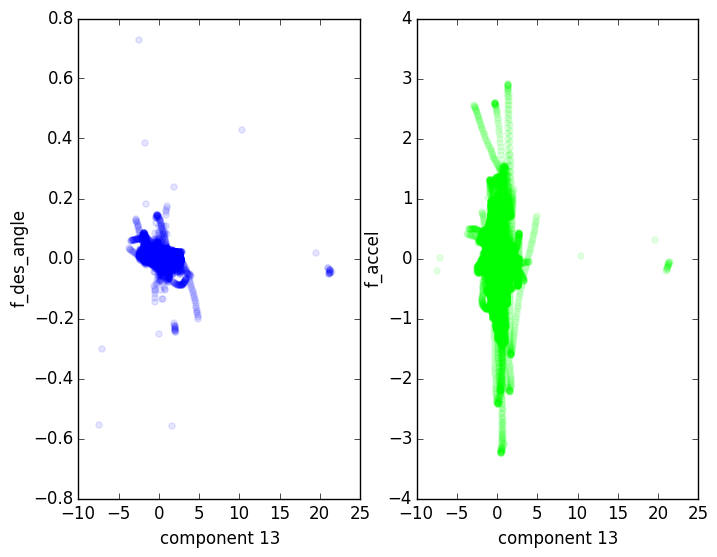

In [23]:
indicators = filter(f->f != :f_accel && f != :f_des_ang, features)
X = Array(Float64, length(indicators), nrow(dataframe))

for (i,sym) in enumerate(indicators)
    for j in 1 : nrow(dataframe)
        val = dataframe[j, sym]::Float64
        if isnan(val) || isinf(val)
            val = FeaturesNew.replace_na(FeaturesNew.symbol2feature(sym))::Float64
        end
        X[i,j] = val
    end
    
    mu = mean(X[i,:])
    stdev = std(X[i,:])
    for j in 1 : nrow(dataframe)
        X[i,j] -= mu
        X[i,j] /= stdev
    end
end

U, S, V = svd(X)
F = U*X

fig = figure(facecolor = "white")
@manipulate for component in 1 : length(indicators)
    withfig(fig) do

        arr = F[component,:]

        ax1 = fig[:add_subplot](121)
        ax1[:set_xlabel](@sprintf("component %d", component))
        ax1[:set_ylabel]("f_des_angle")
        ax1[:scatter](arr, arr_f_des_angle, color=[0.0,0.0,1.0,0.1])
        
        ax2 = fig[:add_subplot](122)
        ax2[:set_xlabel](@sprintf("component %d", component))
        ax2[:set_ylabel]("f_accel")
        ax2[:scatter](arr, arr_f_accel, color=[0.0,1.0,0.0,0.1])
    end
end

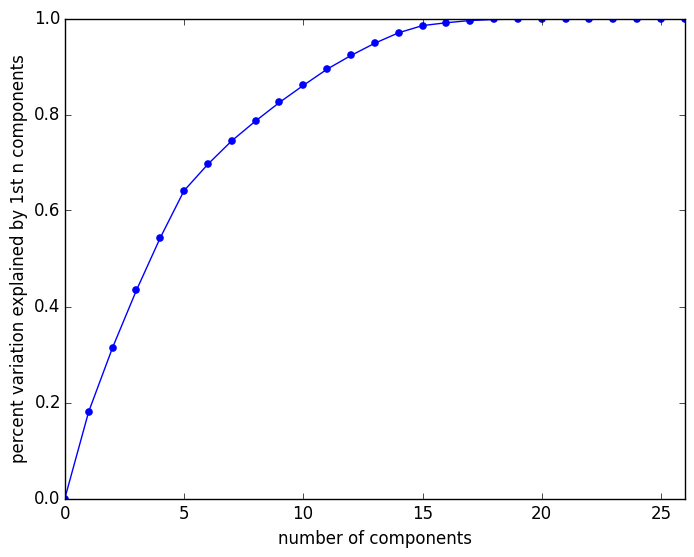

(0,26)

In [22]:
fig = figure(facecolor = "white")
ax = fig[:add_subplot](111)
ax[:set_xlabel]("number of components")
ax[:set_ylabel]("percent variation explained by 1st n components")
ax[:plot](collect(0:length(indicators)), [0.0;cumsum(S.^2)./sum(S.^2)], color="b")
    ax[:scatter](collect(0:length(indicators)), [0.0;cumsum(S.^2)./sum(S.^2)], color="b")
ax[:set_ylim](0.0,1.0)
ax[:set_xlim](0,length(indicators))